In [24]:
import numpy as np
import matplotlib.pyplot as plt

import coffea
from coffea.util import load
import hist
import mplhep as hep

def dense_axes(h):
    '''Returns the list of dense axes of a histogram.'''
    dense_axes = []
    if type(h) == dict:
        h = h[list(h.keys())[0]]
    for ax in h.axes:
        if not type(ax) in [hist.axis.StrCategory, hist.axis.IntCategory]:
            dense_axes.append(ax)
    return dense_axes

def stack_sum(stack):
    '''Returns the sum histogram of a stack (`hist.stack.Stack`) of histograms.'''
    if len(stack) == 1:
        return stack[0]
    else:
        htot = stack[0]
        for h in stack[1:]:
            htot = htot + h
        return htot

def get_axis_items(h, axis_name):
    axis = h.axes[axis_name]
    return list( axis.value( range(axis.size) ) )

def get_ratio(h1, h2):
    if type(h1) == hist.Stack:
        h1 = stack_sum(h1)
    if type(h2) == hist.Stack:
        h2 = stack_sum(h2)
    num = h1.values()
    den = h2.values()
    ratio = num / den
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    unc = np.sqrt(num) / den
    unc[np.isnan(ratio)] = np.nan
    
    return ratio, unc

plt.style.use([hep.style.ROOT, {'font.size': 16}])

In [74]:
filename = "/work/mmarcheg/BTVNanoCommissioning/output/test/fatjet_base_2018UL_v109/output.coffea"
output = load(filename)
output['variables'].keys()

dict_keys(['MuonGood_eta_1', 'MuonGood_pt_1', 'MuonGood_phi_1', 'nElectronGood', 'nMuonGood', 'nJets', 'nFatJets', 'JetGood_eta_1', 'JetGood_pt_1', 'JetGood_phi_1', 'JetGood_btagDeepFlavB_1'])

In [75]:
output['variables']['JetGood_pt_1'].keys()

dict_keys(['l', 'c', 'b', 'cc', 'bb', 'DATA'])

In [76]:
_h = output['variables']['JetGood_pt_1']
_h['l'].values()[0]

array([[[0.00000000e+00, 0.00000000e+00, 1.18268672e+03, 2.13721454e+03,
         1.94629628e+03, 1.83185981e+03, 1.65570056e+03, 1.45604378e+03,
         1.41236519e+03, 1.30343417e+03, 1.32693948e+03, 1.23833548e+03,
         1.29149910e+03, 1.36332357e+03, 1.33206016e+03, 1.35450456e+03,
         1.56178255e+03, 1.55209494e+03, 1.55078068e+03, 1.63951739e+03,
         1.66891674e+03, 1.67180596e+03, 1.67920380e+03, 1.70440011e+03,
         1.64902864e+03, 1.67469083e+03, 1.71029105e+03, 1.75428227e+03,
         1.67810718e+03, 1.69330172e+03, 1.79617652e+03, 1.76094510e+03,
         1.86346872e+03, 1.89365397e+03, 1.86340000e+03, 1.89425476e+03,
         1.84923957e+03, 1.82555407e+03, 1.73985391e+03, 1.74374979e+03,
         1.65952280e+03, 1.54828321e+03, 1.48017448e+03, 1.35882548e+03,
         1.26344372e+03, 1.10534355e+03, 9.85640329e+02, 8.82907685e+02,
         7.86004473e+02, 6.77538172e+02, 6.15460425e+02, 5.53947691e+02,
         4.90294009e+02, 4.42038895e+02, 4.06214780

In [77]:
mapping_flavor = {'l' : ['l'], 'bb' : ['b', 'bb'], 'cc' : ['c', 'cc']}
h_grouped = {}
output_templates = {}
for histname in ['JetGood_pt_1']:
    h = output['variables'][histname]
    h = {'l' : h['l'], 'b+bb' : h['b'] + h['bb'], 'c+cc' : h['c'] + h['cc'], 'DATA' : h['DATA']}
    samples = h.keys()
    samples_data = list(filter(lambda d : 'DATA' in d, samples))
    samples_mc   = list(filter(lambda d : 'DATA' not in d, samples))

    h_mc = h[samples_mc[0]]

    dense_axis = dense_axes(h_mc)[0]
    years      = get_axis_items(h_mc, 'year')
    categories = get_axis_items(h_mc, 'cat')
    variations = get_axis_items(h_mc, 'variation')
    
    for year in years:
        for cat in categories:
            slicing = {'cat' : cat, 'year' : year}
            for f in samples_data:
                sumw, sumw2 = h[f][slicing].values(), h[f][slicing].variances()
                output_templates[f"{histname}_{year}_{cat}_{f}"] = [sumw, sumw2]
            for var in variations:
                for f in samples_mc:
                    slicing.update({'variation' : var})
                    sumw, sumw2 = h[f][slicing].values(), h[f][slicing].variances()
                    output_templates[f"{histname}_{year}_{cat}_QCD_{f}"] = [sumw, sumw2]

In [78]:
list(output_templates.keys())

['JetGood_pt_1_2018_baseline_DATA',
 'JetGood_pt_1_2018_baseline_QCD_l',
 'JetGood_pt_1_2018_baseline_QCD_b+bb',
 'JetGood_pt_1_2018_baseline_QCD_c+cc',
 'JetGood_pt_1_2018_inclusive_DATA',
 'JetGood_pt_1_2018_inclusive_QCD_l',
 'JetGood_pt_1_2018_inclusive_QCD_b+bb',
 'JetGood_pt_1_2018_inclusive_QCD_c+cc',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-400to600_DATA',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-400to600_QCD_l',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-400to600_QCD_b+bb',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-400to600_QCD_c+cc',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-400toInf_DATA',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-400toInf_QCD_l',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-400toInf_QCD_b+bb',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-400toInf_QCD_c+cc',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-600to800_DATA',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-600to800_QCD_l',
 'JetGood_pt_1_2018_msd40btagDDBvLV2failHwpPt-600to

In [79]:
h = h_grouped
samples = h.keys()
samples_data = list(filter(lambda d : 'DATA' in d, samples))
samples_mc   = list(filter(lambda d : 'DATA' not in d, samples))

h_mc = h[samples_mc[0]]

dense_axis = dense_axes(h_mc)[0]
years      = get_axis_items(h_mc, 'year')
categories = get_axis_items(h_mc, 'cat')
variations = get_axis_items(h_mc, 'variation')

if len(samples_data) == 0:
    isMC = True
else:
    isMC = False

#print(categories)
cat = 'inclusive'
slicing_mc   = {'year' : '2018', 'cat' : cat, 'variation' : 'nominal'}
dict_mc   = {d : h[d][slicing_mc] for d in samples_mc}
stack_mc = hist.Stack.from_dict(dict_mc)
x = stack_mc.axes[0].centers
if not isMC:
    slicing_data = {'year' : '2018', 'cat' : cat}
    dict_data = {d : h[d][slicing_data] for d in samples_data}
    stack_data = hist.Stack.from_dict(dict_data)
stack_mc

IndexError: list index out of range

/tmp/ipykernel_42485/255723758.py:40: RuntimeWarning: invalid value encountered in true_divide
  ratio = num / den
/tmp/ipykernel_42485/255723758.py:43: RuntimeWarning: invalid value encountered in true_divide
  unc = np.sqrt(num) / den


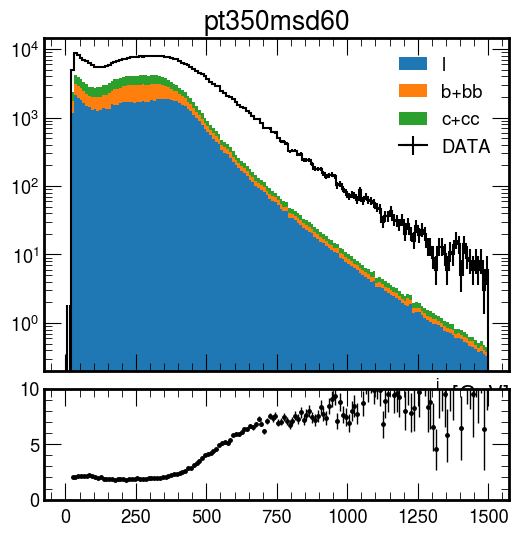

In [80]:
fig, (ax, rax) = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.08)
stack_mc.plot(stack=True, histtype='fill', ax=ax)
stack_data.plot(stack=True, color='black', ax=ax)
ratio, unc = get_ratio(stack_data, stack_mc)
rax.errorbar(x, ratio, unc, linewidth=0, marker='.', markersize=5, elinewidth=1, color='black')
#ax.set_xlim(0,500)
#ax.set_ylim(0,10**5)
rax.set_ylim(0,10)
ax.set_yscale("log")
ax.set_title(cat)
ax.legend(loc="upper right");